In [1]:
!pip install mne
!pip install EDFlib-Python

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [2]:
import numpy as np
import pandas as pd 
import mne
#import EDFlib-Python

In [3]:
data = pd.read_csv('file.csv', delimiter = "\t", header = None).iloc[:,1:9]
ch_names = ['Fp1', 'Fp2', 'C1', 'C2', 'P7', 'P8', 'O1', 'O2']

sfreq = 250 
info = mne.create_info(ch_names = ch_names, sfreq = sfreq)
info['experimenter'] = 'Michael Huang, Adan Montes de Oca, Sripad Karne'

raw = mne.io.RawArray(data.transpose(), info)
raw

Creating RawArray with float64 data, n_channels=8, n_times=77587
    Range : 0 ... 77586 =      0.000 ...   310.344 secs
Ready.


<RawArray | 8 x 77587 (310.3 s), ~4.7 MB, data loaded>

Using matplotlib as 2D backend.


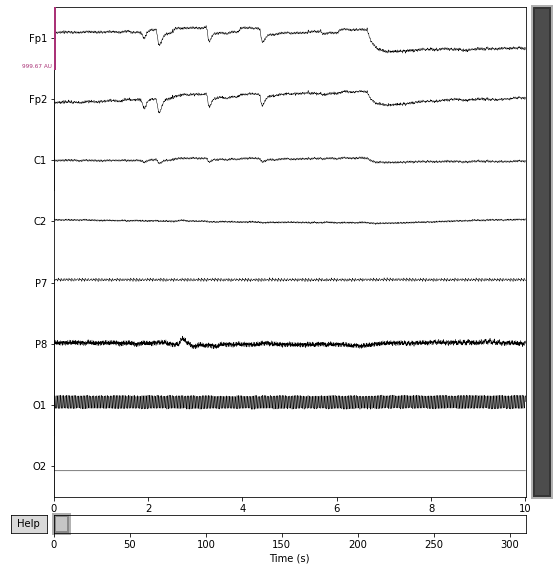

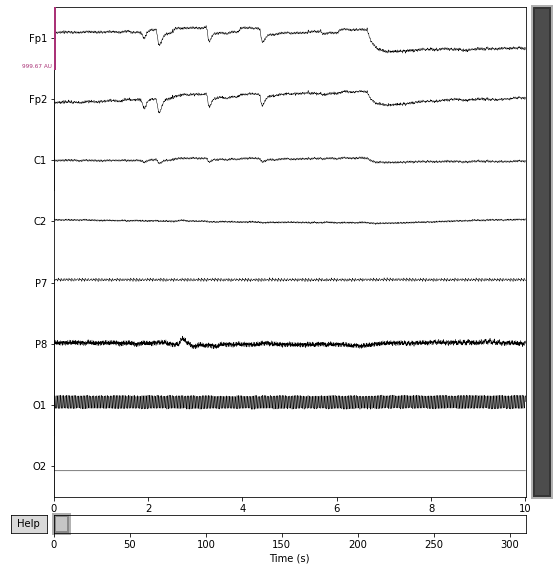

In [4]:
raw.plot()

In [5]:
med_annotations = mne.Annotations(onset=[52, 121, 168, 210, 250, 297, 330, 406, 450, 483, 553],  # in seconds
                           duration= np.repeat(5, 11),  # in seconds, too
                           description=['333', '242', '342','243', '223', '333','432', '443', '233','233', '233'])
print(med_annotations)

raw.set_annotations(med_annotations)

raw.annotations.save('meditation-annotations.csv', overwrite=True)

<Annotations | 11 segments: 223 (1), 233 (3), 242 (1), 243 (1), 333 (2), ...>
Overwriting existing file.


<ipython-input-5-1891ff293d9c>:6: RuntimeWarning: Omitted 5 annotation(s) that were outside data range.
  raw.set_annotations(med_annotations)


In [6]:
mne.export.export_raw('meditation.edf',raw, fmt='edf')

<ipython-input-6-6f8a35b7c96c>:1: RuntimeWarning: EDF format requires equal-length data blocks, so 0.652 seconds of zeros were appended to all channels when writing the final block.
  mne.export.export_raw('meditation.edf',raw, fmt='edf')
